# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier


## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [117]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1. Se quiere construir un predictor que tome decisiones para aprobrar creditos hipotercarios de vivienda. Conocidos como HELOC los cuales se caracterizan a menudo por tener una tasa de interés más baja que otros tipos comunes de préstamos, y su interés puede ser deducible de impuestos. Cada registro consiste en diversos datos del credito otorgado a través del proceso actual de concesión de préstamos.   


2. La variable objetivo que se quiere predecir es Target, la cual es una variable binaria indica si el solicitante finalmente incumplió con el credito hipotecario (1) o pago el credito (0). El incumplimiento del pago se encuentra en 1189 casos.  



3. Los atributos del dataset son los siguientes

LOAN: Monto solicitado del préstamo.

MORTDUE: Monto adeudado de la hipoteca existente.

VALUE: Valor de la propiedad actual.

YOJ: Años en el trabajo actual.

DEROG: Número de informes despectivos importantes, la cual indica una morosidad grave o retrasos en los pagos.

DELINQ: Número de líneas de crédito morosas. Una línea de crédito se vuelve morosa cuando un prestatario no realiza los pagos mínimos requeridos entre 30 y 60 días después del día en que vencían los pagos.

CLAGE: Edad de la línea crédito más antigua en meses.

NINQ: Número de líneas de crédito recientes.

CLNO: Número de líneas de crédito existentes.

DEBTINC: Relación deuda-ingresos. (todos los pagos mensuales de su deuda divididos por su ingreso bruto mensual). Este número es una forma en que los prestamistas miden su capacidad para administrar los pagos mensuales para pagar el dinero que planea pedir prestado


4. Creemos que los atributos que nos ayudaran a predecir si se incumplio o no con el pago del credito son el monto del prestamo (`Loan`), la relacion deuda-ingresos `DEBTINC`y el número de lineas de crédito mosoras `DELINQ`



## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [118]:
model = SGDClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

classes = model.classes_
print(classes)


[0 1]


In [119]:
from sklearn.metrics import (accuracy_score,
                             classification_report,
                             ConfusionMatrixDisplay,
                             accuracy_score,
                             f1_score,
                             recall_score,
                             precision_score
                             )

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

print("Accuracy:", accuracy)

Accuracy: 0.8221024258760108
F1 Score: 0.0
Recall: 0.0
Precision: 0.0
Accuracy: 0.8221024258760108


C:\Users\Usuario\anaconda3\envs\diplo\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.82      1.00      0.90       305
           1       0.00      0.00      0.00        66

    accuracy                           0.82       371
   macro avg       0.41      0.50      0.45       371
weighted avg       0.68      0.82      0.74       371



C:\Users\Usuario\anaconda3\envs\diplo\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\envs\diplo\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\envs\diplo\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


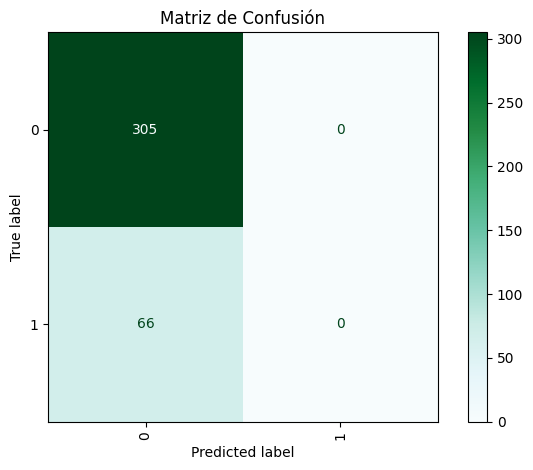

In [120]:
classes = model.classes_

display=ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, labels=classes, cmap=plt.cm.BuGn, xticks_rotation='vertical')
print(classification_report(y_test, y_pred, labels=classes))

plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [121]:
from sklearn import tree


tree= tree.DecisionTreeClassifier(#criterion='entropy',
                                   random_state=42,
                                   #min_samples_split=500,
                                   #min_samples_leaf=100
                                   )
tree =tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)


In [124]:
# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.8787061994609164
F1 Score: 0.6280991735537191
Recall: 0.5757575757575758
Precision: 0.6909090909090909


              precision    recall  f1-score   support

           0       0.91      0.94      0.93       305
           1       0.69      0.58      0.63        66

    accuracy                           0.88       371
   macro avg       0.80      0.76      0.78       371
weighted avg       0.87      0.88      0.87       371



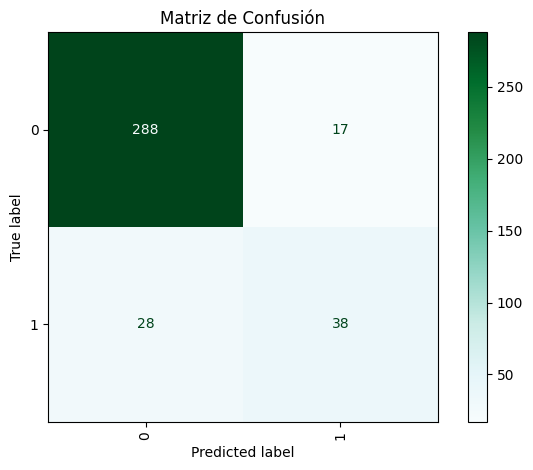

In [125]:
classes = model.classes_

display=ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, labels=classes, cmap=plt.cm.BuGn, xticks_rotation='vertical')
print(classification_report(y_test, y_pred, labels=classes))

plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html